## Lavasee: Änderung der Krustendicke mit der Zeit bei der Abkühlung
#### Übung 5-6 Philpotts. 


Ende 1959 und Anfang 1960 bildete der Ausbruch des Kilauea Iki, Hawaii, einen 100 m tiefen Lavasee. Die Oberfläche des Sees war schnell mit einer Kruste bedeckt, die sich mit dem Abkühlen zu verdicken begann, aber Lava mit der Anfangstemperatur von 1150 °C existierte noch viele Monate nach dem Ausbruch in der Tiefe des Sees.\
(a) Berechnen Sie unter Verwendung der 1065 °C-Isotherme als Basis der Kruste (50 % kristallin) ein Diagramm der Krustendicke in Abhängigkeit von der Quadratwurzel der Abkühlungszeit in Monaten für die frühe Periode, in der Magma mit der Anfangstemperatur noch in der Tiefe des Sees existierte, und tragen Sie es auf. Nehmen Sie an, dass die Oberfläche des Lavasees bei einer konstanten Lufttemperatur von 25 °C blieb, die Temperaturleitfähigkeit von
geschmolzener und fester Lava 1E-6 m2/s beträgt, und die latente Kristallisationswärme vernachlässigt werden kann. 

>Dieses Problem kann mit Hilfe von Gl. 5.13 gelöst werden, wenn die Anfangs- und Randbedingungen so angepasst werden können, dass sie zu denen von Gl. 5.13 passen. Wir können so tun, als ob Landgestein über dem Lavasee liegt und null Grad hat; die Oberflächentemperatur des Lavasees (25 °C) muss dann nach oben angepasst werden, ebenso wie die anfängliche Lavatemperatur (1150 °C) und die Basis der Lavakruste (1065 °C), so dass die Oberflächentemperatur (1150-25 °C) des Lavasees die Hälfte der angepassten anfänglichen Magmatemperatur beträgt. (Die maximale Temperatur am Kontakt ist die Hälfte der Magmentemperatur). Sie erfüllt dann Gl. 5.13. Die angepasste initiale Magmentemperatur wäre dann 2250 °C, und entsprechend die angepasste Temperatur der Lavakruste 2165 °C.


* k : thermische Diffusivität des Magmas
* Tb : angepasste Temp. der Lavakruste, erhöht um die Kristallisationsenthalpie (P=const. -> Kristallisationswärme)
* To : angepasste T des initialen Magmas

[Download Python Code](5-6Philpotts.py)

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special
k = 1E-6
Tb = 2165.
To = 2250.
t = np.linspace(0., 36.0, 100)
# solving eq. 5.57   2165/2250 = 1/2 + 1/2 x erf[x/2 sqr(Dt)]


Die Gleichung 5.57 wird zu \
`2165/2250 = 1/2 + 1/2 x erf[x/2 sqr(kt)]` \
Der letzte Term wird mit erfx abgekürzt. Dann nach erfx auflösen.

In [40]:
erfx = (Tb/To - 0.5)*2
print('erf[x/2 sqr(kt)] =', erfx)
print('daher: x/2 sqr(kt) = ', special.erfinv(erfx))

erf[x/2 sqr(kt)] = 0.9244444444444444
daher: x/2 sqr(kt) =  1.2565832672372224


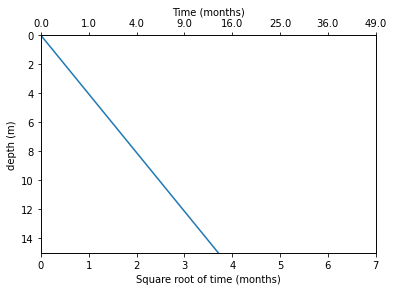

In [38]:
z = special.erfinv(erfx)*2*np.sqrt(t*30*24*3600*k)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(np.sqrt(t), z)
ax1.set_xlim(0, 7)
ax1.set_xlabel("Square root of time (months)")
ax1.set_ylabel("depth (m)")

ax2 = ax1.twiny()
ax2.set_xlabel("Time (months)")
ax1Xs = ax1.get_xticks()
ax2Xs = []
for X in ax1Xs:
    ax2Xs.append(X**2)

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1Xs)
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(ax2Xs)
ax1.set_ylim(0, 15)
plt.gca().invert_yaxis()
plt.show()